In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [5]:
df_test = pd.read_csv('./Data/test.csv')
df_train = pd.read_csv('./Data/train.csv')


In [3]:
display(df_test.head(10))
display(df_train.head(10))

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
5,1117962,3,4,8,4,6,5,2,5,9,...,6,4,3,7,1,6,6,3,5,6
6,1117963,5,5,6,8,6,5,3,6,9,...,6,4,2,5,5,5,4,6,5,5
7,1117964,6,9,6,5,5,5,3,8,10,...,3,5,6,1,2,5,3,6,4,4
8,1117965,6,5,2,4,6,4,5,8,4,...,4,2,6,6,7,3,3,6,5,2
9,1117966,4,8,8,4,7,7,4,1,3,...,7,8,4,4,7,10,3,6,7,3


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
5,5,5,4,1,4,2,4,6,6,7,...,3,5,5,4,4,6,8,3,2,0.440
6,6,8,3,1,2,3,7,3,4,6,...,2,5,6,4,5,6,3,4,6,0.460
7,7,6,6,5,7,5,5,3,5,5,...,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,...,9,2,7,3,4,6,4,5,5,0.505
9,9,4,2,3,5,8,6,5,5,7,...,6,3,3,4,4,3,3,5,6,0.455


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   id                               745305 non-null  int64
 1   MonsoonIntensity                 745305 non-null  int64
 2   TopographyDrainage               745305 non-null  int64
 3   RiverManagement                  745305 non-null  int64
 4   Deforestation                    745305 non-null  int64
 5   Urbanization                     745305 non-null  int64
 6   ClimateChange                    745305 non-null  int64
 7   DamsQuality                      745305 non-null  int64
 8   Siltation                        745305 non-null  int64
 9   AgriculturalPractices            745305 non-null  int64
 10  Encroachments                    745305 non-null  int64
 11  IneffectiveDisasterPreparedness  745305 non-null  int64
 12  DrainageSystems               

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

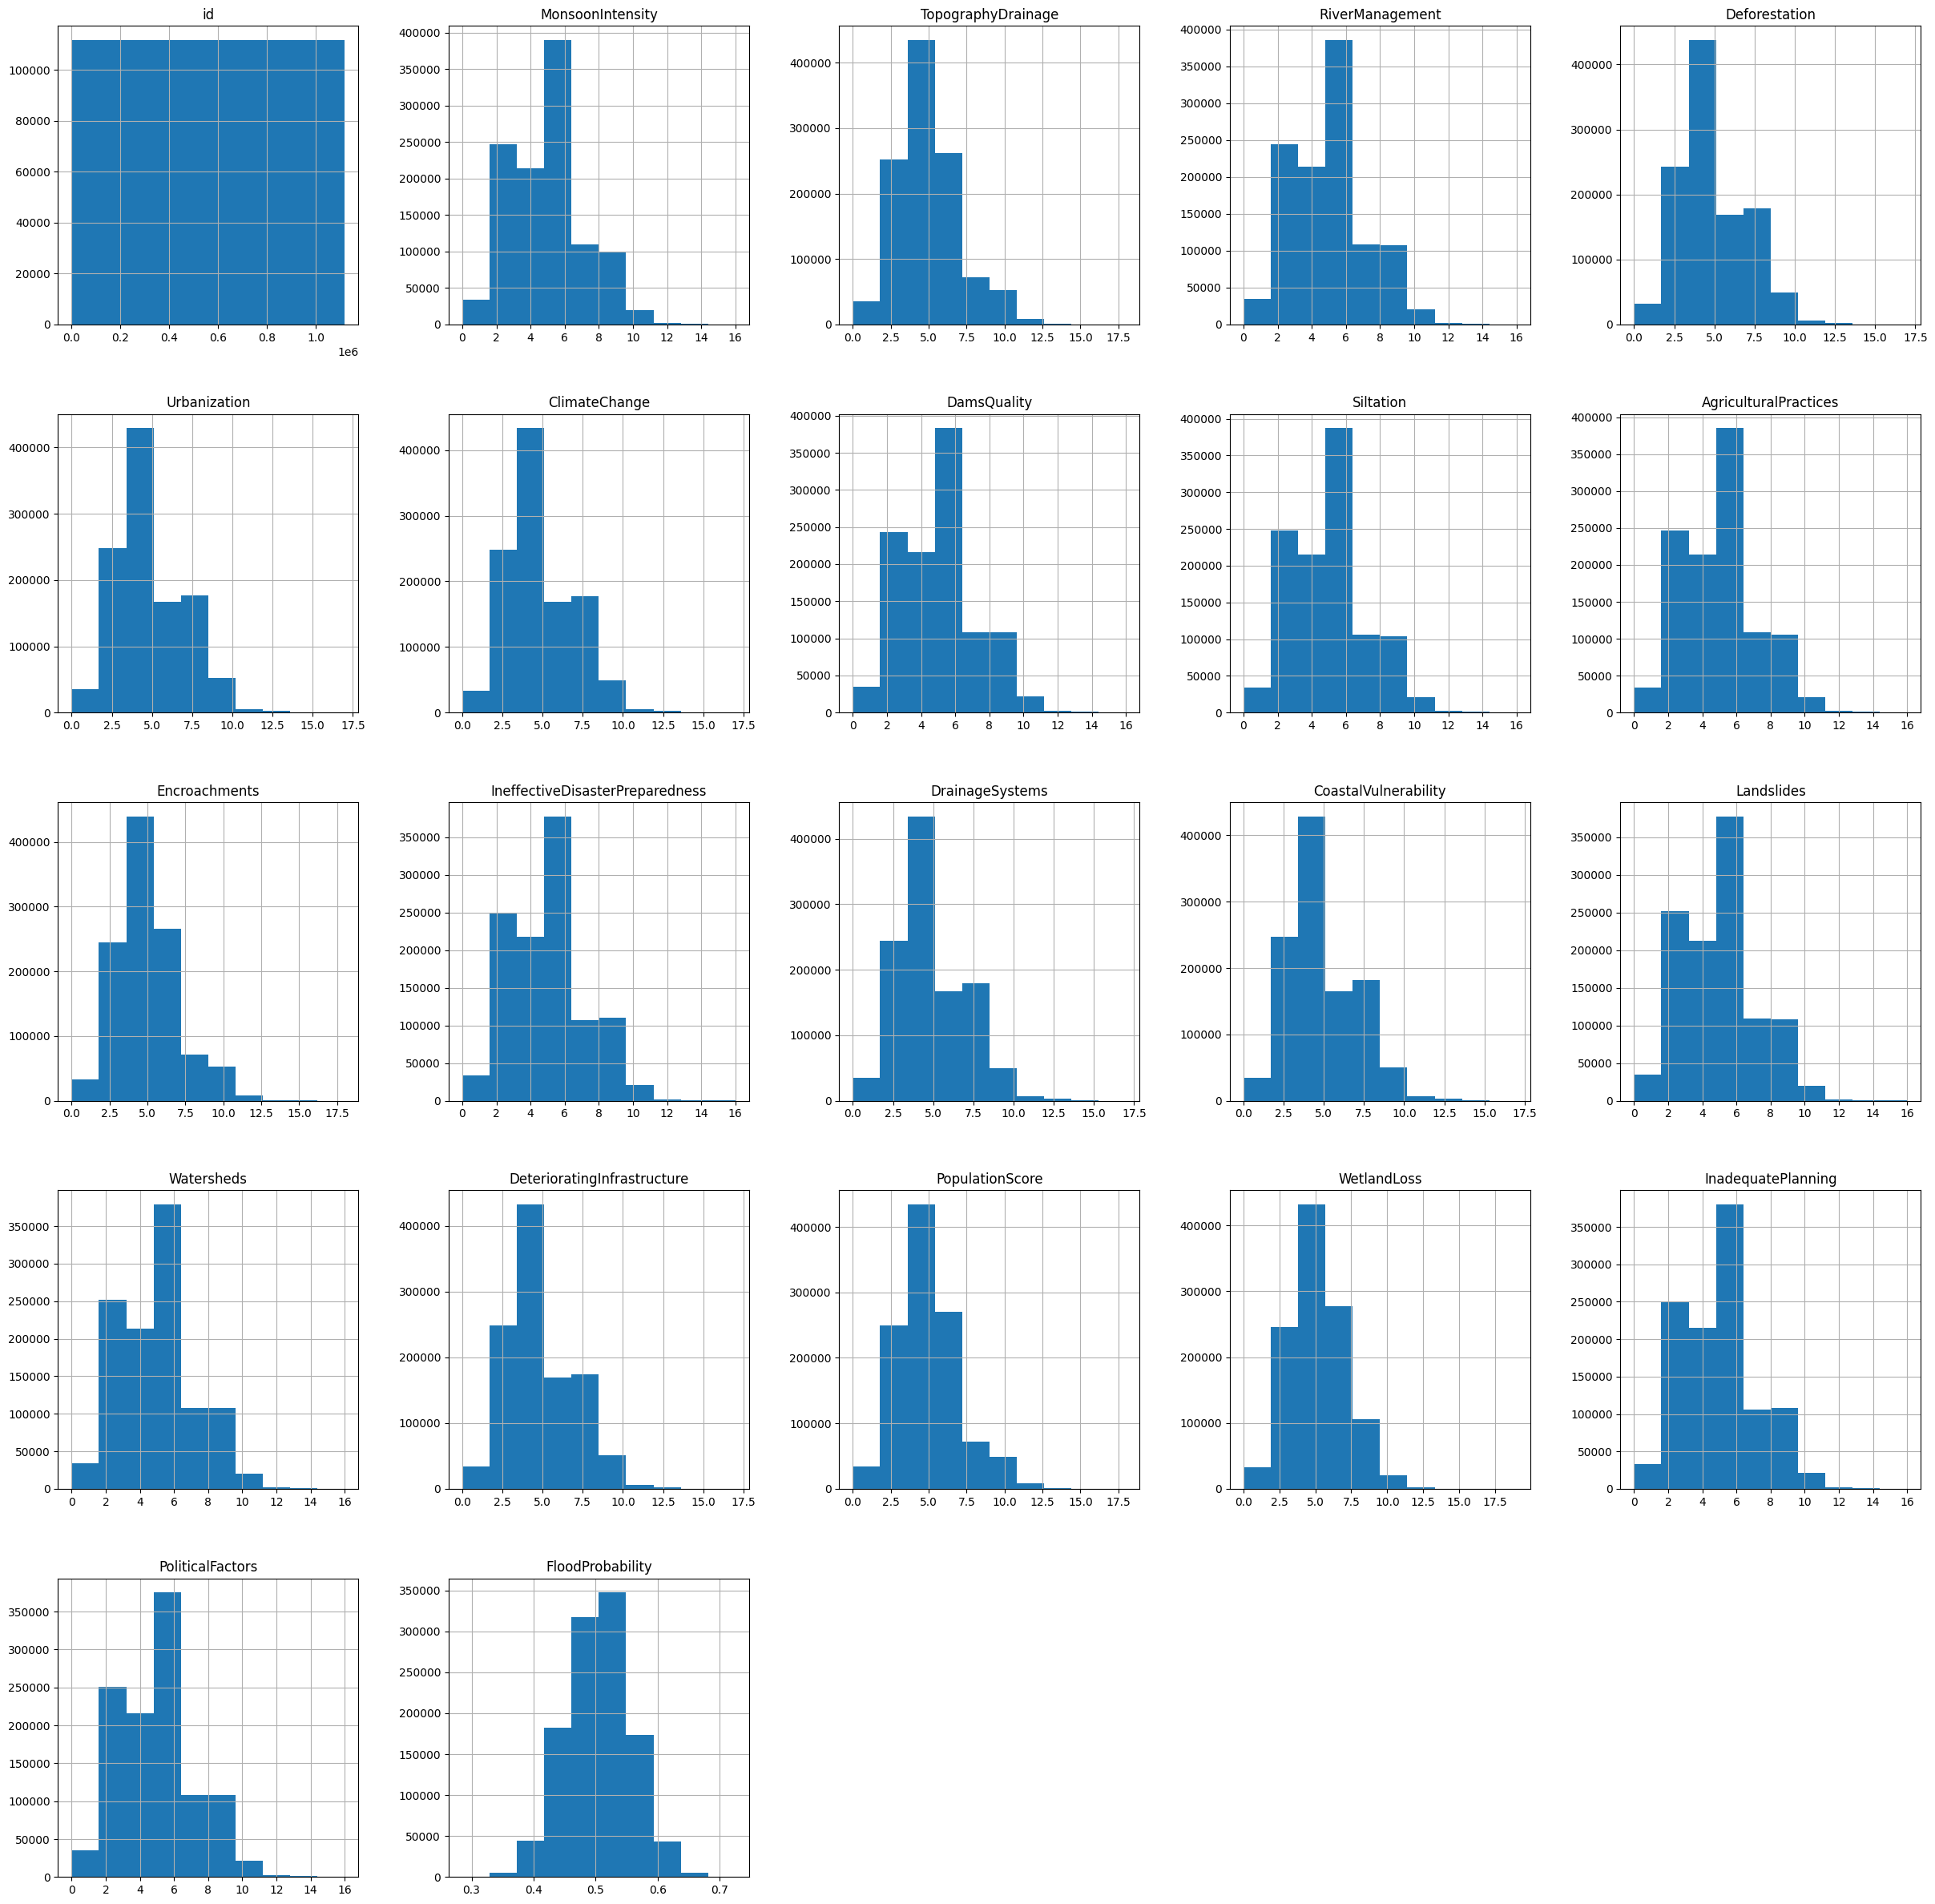

In [6]:
df_train.hist(figsize=(30, 30));

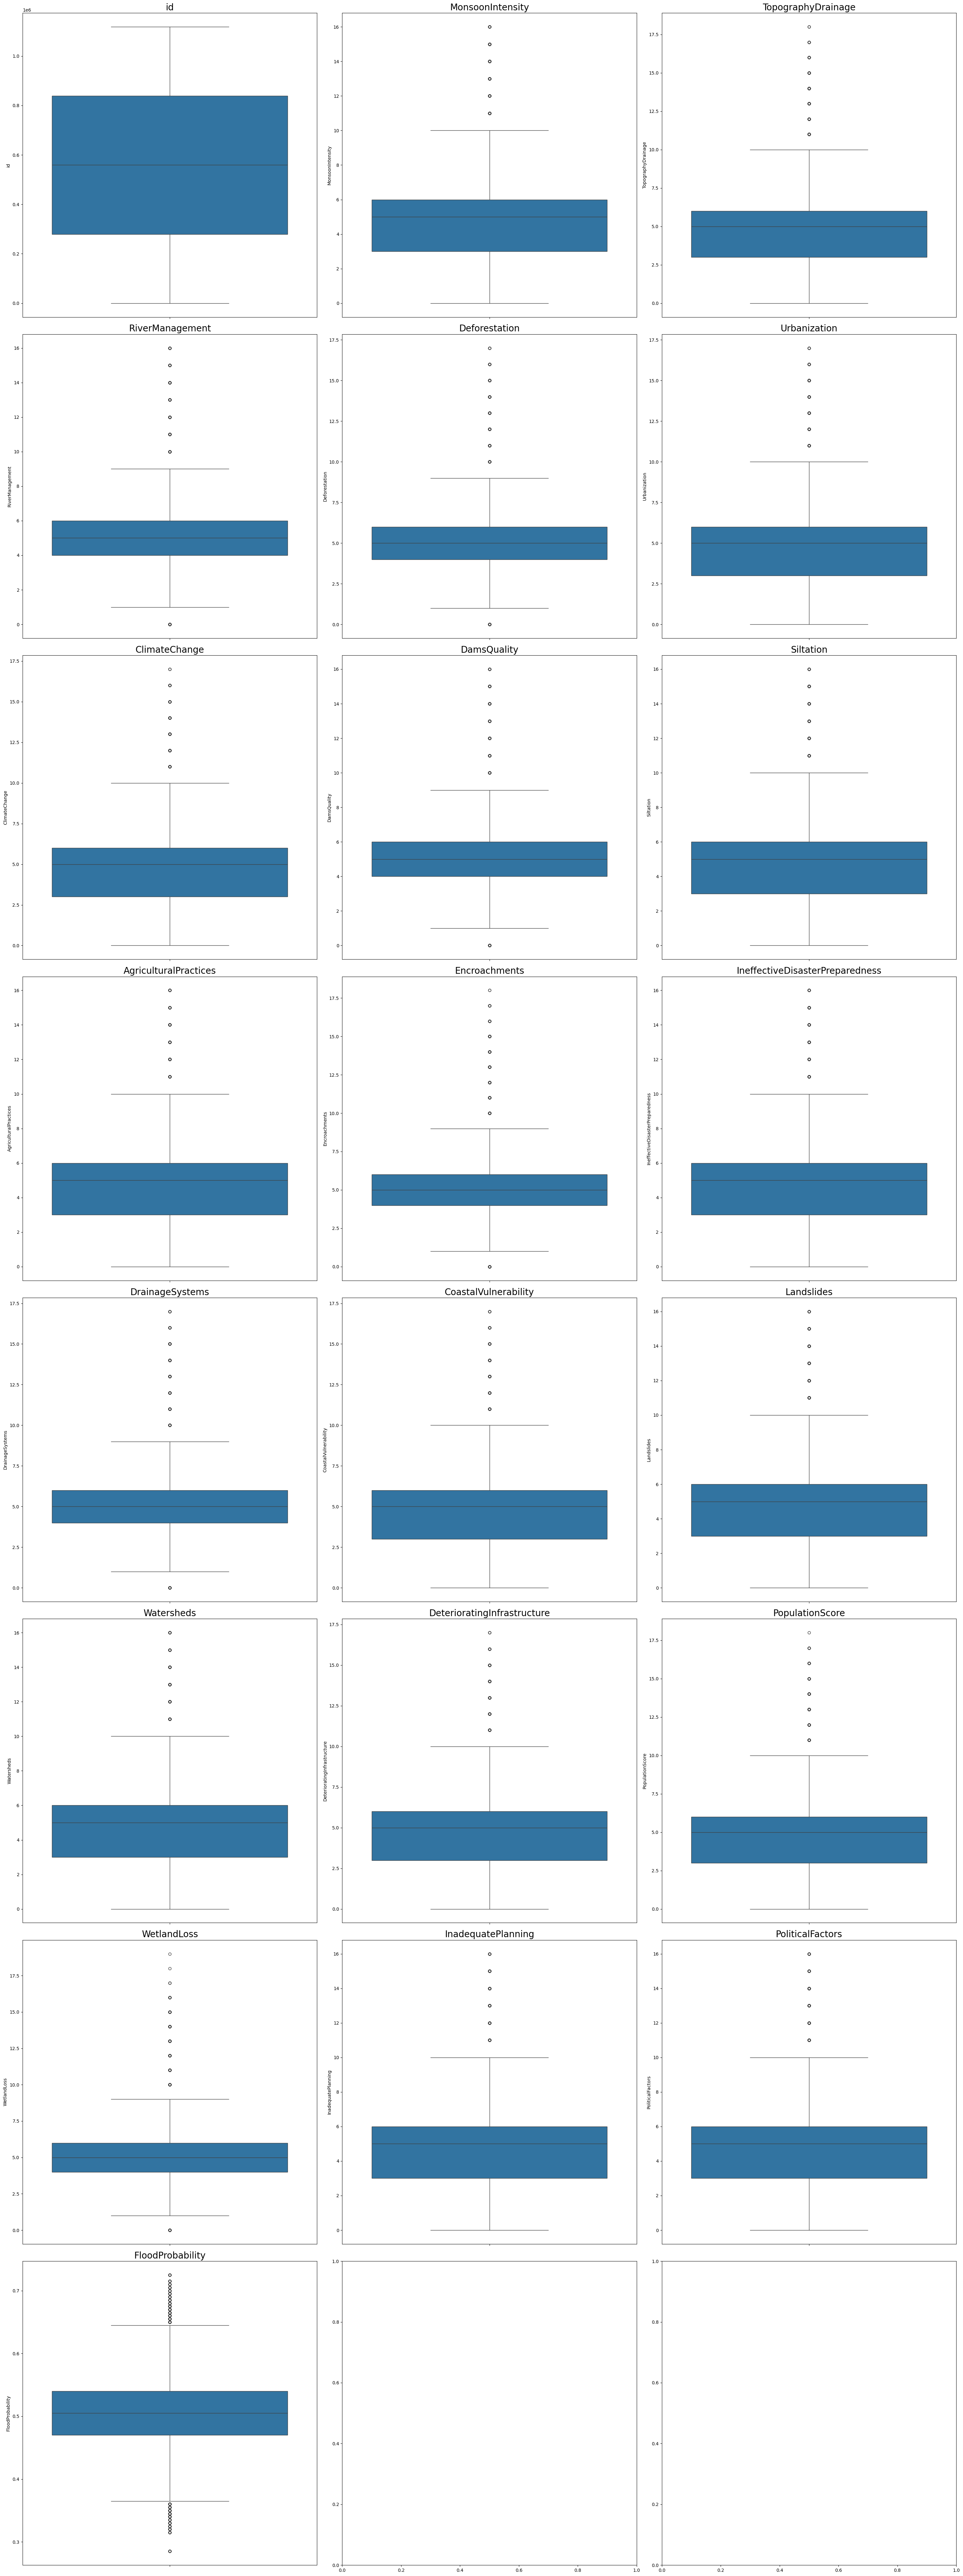

In [7]:
fig, ax = plt.subplots(8,3, figsize=(30, 80))
ax = ax.flatten()

sns.set_theme(style="white")

for i, col in enumerate(df_train.columns):
    sns.boxplot(y=df_train[col], ax=ax[i])
    ax[i].set_title(col, fontsize=20)
    ax[i].grid(False)
plt.tight_layout()
plt.show()

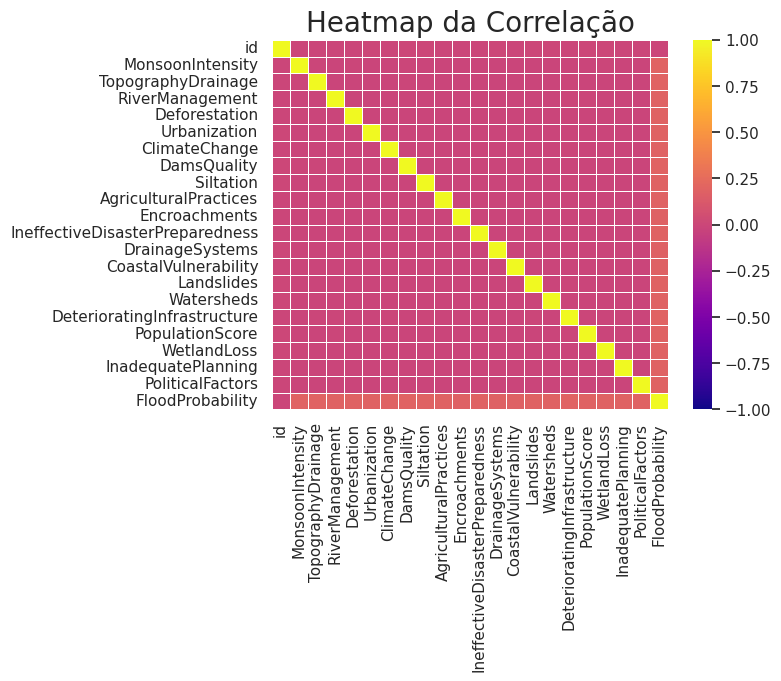

In [8]:
corr = df_train.corr()

sns.heatmap(corr, cmap='plasma', linewidths=0.5,vmin=-1, vmax=1)
plt.title('Heatmap da Correlação', fontsize=20)

plt.show()

In [18]:
X = df_train.drop("FloodProbability", axis=1)
y = df_train["FloodProbability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

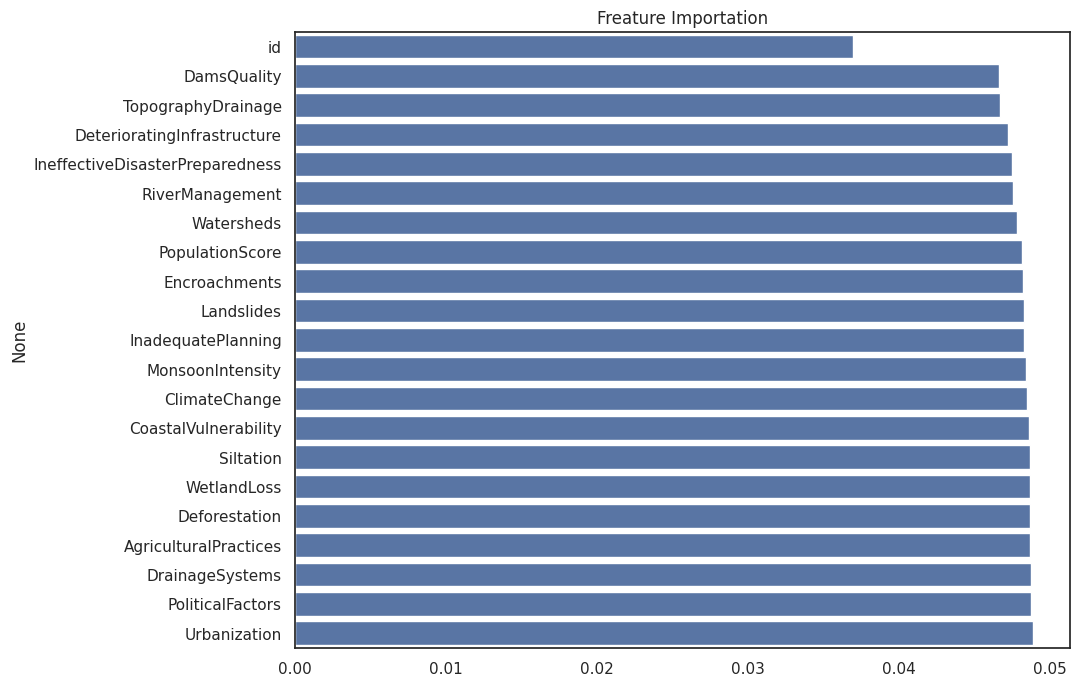

In [15]:
rf_freatures_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize = (10, 8))
sns.barplot(x = rf_freatures_importance.values, y=rf_freatures_importance.index)
plt.title("Freature Importation")
plt.show()

In [32]:
lr = LinearRegression()
scores = cross_val_score(lr, X, y,cv=10,scoring='r2')
print(f"R2 medio:{sum(scores)*10:.2f}")

R2 medio:84.49
